<a href="https://colab.research.google.com/github/shahyash07/Technical-analysis-indicators-implementation-for-asset-optimization/blob/master/Technical_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas==0.25.0

     |████████████████████████████████| 10.5MB 4.8MB/s 
ERROR: zipline 1.3.0 has requirement pandas<=0.22,>=0.18.1, but you'll have pandas 0.25.0 which is incompatible.
ERROR: pyportfolioopt 0.5.3 has requirement pandas<0.26.0,>=0.25.3, but you'll have pandas 0.25.0 which is incompatible.
  Found existing installation: pandas 0.22.0
    Uninstalling pandas-0.22.0:
      Successfully uninstalled pandas-0.22.0


In [ ]:
# !pip install zipline
# !pip install watermark
!pip install pyfolio
!pip install yahoofinancials
!pip install PyPortfolioOpt


     |████████████████████████████████| 92kB 2.9MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2-cp36-none-any.whl size=88668 sha256=0614acc1d69b7689e92a45129bd5b629c82c5c15190b339541d14326884ba839
  Stored in directory: /root/.cache/pip/wheels/0d/a8/7d/ac33fe6bf6f3db370291c9de303460d00b8f97cc40a1d80f72
  Created wheel for empyrical: filename=empyrical-0.5.3-cp36-none-any.whl size=37089 sha256=8a917639f29b0cdccd0a34a6cd110505cba81968a4b52c223c8aa252a40fb207
  Stored in directory: /root/.cache/pip/wheels/10/a4/3b/951bd609878a82fd72b9ea23699daf1eaada4ff6f583152876
Successfully built pyfolio empyrical
  Created wheel for yahoofinancials: filename=yahoofinancials-1.5-cp36-none-any.whl size=15195 sha256=3e80fe9ed17f5ef49b6e24d2bef726d050470b1519d36bde19f7d7a50b6fe70b
  Stored in directory: /root/.cache/pip/wheels/42/15/e7/240c5cdc8782b9479ba73404640a3be57bb4053a5c3edd6be5
Successfully built yahoofinancials


In [ ]:
# %load_ext zipline
# %load_ext watermark

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import zipline
import warnings
import pyfolio as pf
import empyrical as ep
import yahoofinancials
from yahoofinancials import YahooFinancials
from datetime import datetime
from dateutil.relativedelta import relativedelta

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 200
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.6/dist-packages/pyfolio/pos.py:28: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  ' to position notionals.'


In [ ]:
risky_assets = ['TSLA', 'GOOG', 'AAPL']

yahoo_financials = YahooFinancials(risky_assets)
data = yahoo_financials.get_historical_price_data('2018-01-01', '2018-12-31', 'daily')

prices_df = pd.DataFrame({
    asset: {x['formatted_date']: x['adjclose'] for x in data[asset]['prices']} for asset in risky_assets
})
prices_df.head()

,TSLA,GOOG,AAPL
2018-01-02,320.529999,1065.000000,167.199890
2018-01-03,317.250000,1082.479980,167.170776
2018-01-04,314.619995,1086.400024,167.947266
2018-01-05,316.579987,1102.229980,169.859406
2018-01-08,336.410004,1106.939941,169.228500


In [ ]:
import pandas as pd
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns


# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(prices_df)
S = risk_models.sample_cov(prices_df)

# Optimise for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
ef.portfolio_performance(verbose=True)

Expected annual return: 21.0%
Annual volatility: 58.7%
Sharpe Ratio: 0.32


(0.2101506981091351, 0.5872798229581457, 0.32378210637535687)

In [ ]:
# calculate expected returns and sample covariance amtrix
avg_returns = expected_returns.mean_historical_return(prices_df)
cov_mat = risk_models.sample_cov(prices_df)

In [ ]:
ret_data = prices_df.pct_change()[1:]

ret_data


,TSLA,GOOG,AAPL
2018-01-03,-0.010233,0.016413,-0.000174
2018-01-04,-0.008290,0.003621,0.004645
2018-01-05,0.006230,0.014571,0.011385
2018-01-08,0.062638,0.004273,-0.003714
2018-01-09,-0.008085,-0.000614,-0.000115
...,...,...,...
2018-12-21,0.013920,-0.029592,-0.038896
2018-12-24,-0.076242,-0.003389,-0.025874
2018-12-26,0.103930,0.064780,0.070422
2018-12-27,-0.030544,0.004252,-0.006490


In [ ]:
avg_returns

TSLA    0.210151
GOOG    0.012880
AAPL   -0.042448
dtype: float64

In [ ]:
# get weights maximizing the Sharpe ratio
ef = EfficientFrontier(avg_returns, cov_mat)
weights = ef.max_sharpe()
cleaned_weights1 = ef.clean_weights()
cleaned_weights1

{'AAPL': 0.0, 'GOOG': 0.0, 'TSLA': 1.0}

In [ ]:
w1=list(cleaned_weights1.values())
w1


[1.0, 0.0, 0.0]

In [ ]:
#GETTING WEIGHTS FOR MINIMIZING VOLATILITY
weights=ef.min_volatility()
cleaned_weights2=ef.clean_weights()
cleaned_weights2

{'AAPL': 0.44933, 'GOOG': 0.50761, 'TSLA': 0.04306}

In [ ]:
w2=list(cleaned_weights2.values())
w2

[0.03264, 0.50033, 0.46702]

https://www.pythonforfinance.net/2017/01/21/investment-portfolio-optimisation-with-python/

In [ ]:
!pip install pyEX

     |████████████████████████████████| 51kB 2.5MB/s 
     |████████████████████████████████| 778kB 14.0MB/s 
     |████████████████████████████████| 204kB 46.7MB/s 
     |████████████████████████████████| 348kB 51.5MB/s 
  Created wheel for sseclient: filename=sseclient-0.0.24-cp36-none-any.whl size=5524 sha256=d54dab261d51056dce25dfa108de3bbf344a2c813dba00acbe1ffdc65298b08c
  Stored in directory: /root/.cache/pip/wheels/2b/51/69/ebb2c982c9bce057173960e73c22bcd6ee314f76106b3b5524
Successfully built sseclient
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.11.1 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfu

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from matplotlib import figure

In [ ]:
#list of stocks in portfolio
stocks = ['GOOG']

In [ ]:
#download daily price data for each of the stocks in the portfolio
data = web.DataReader(stocks,data_source='yahoo',start='01/01/2018',end='31/12/2018')['Adj Close']
data.sort_index(inplace=True)

In [ ]:
data.head()

Symbols,GOOG
Date,
2018-01-02,1065.000000
2018-01-03,1082.479980
2018-01-04,1086.400024
2018-01-05,1102.229980
2018-01-08,1106.939941


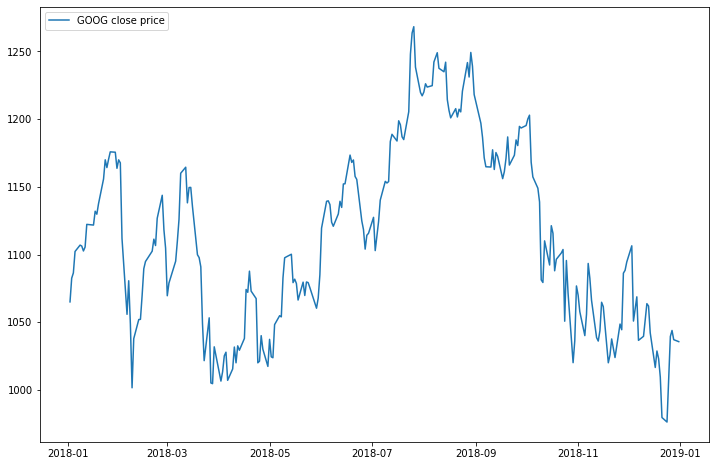

In [ ]:
data.columns=['close']
plt.figure(figsize=(12,8))
plt.plot(data.close, label='GOOG close price')
plt.legend(loc='upper left')
plt.show()

SMA

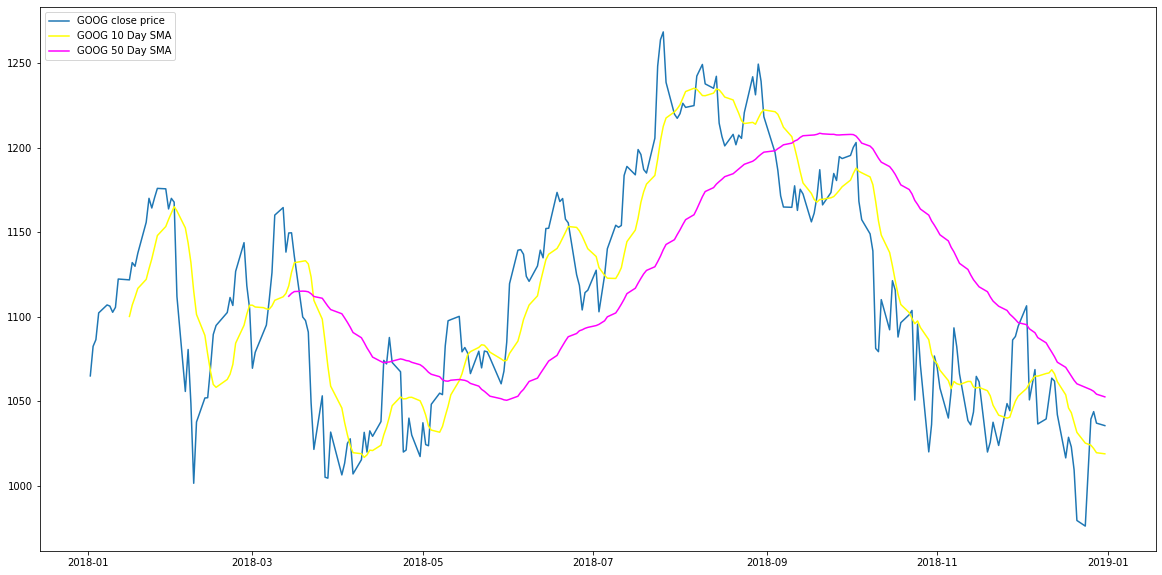

In [ ]:
rolling_mean = data.close.rolling(window=10).mean()
rolling_mean2 = data.close.rolling(window=50).mean()
plt.figure(figsize=(20,10))
plt.plot(data.close, label='GOOG close price')
plt.plot(rolling_mean, label='GOOG 10 Day SMA', color='yellow')
plt.plot(rolling_mean2, label='GOOG 50 Day SMA', color='magenta')
plt.legend(loc='upper left')
plt.show()

EMA

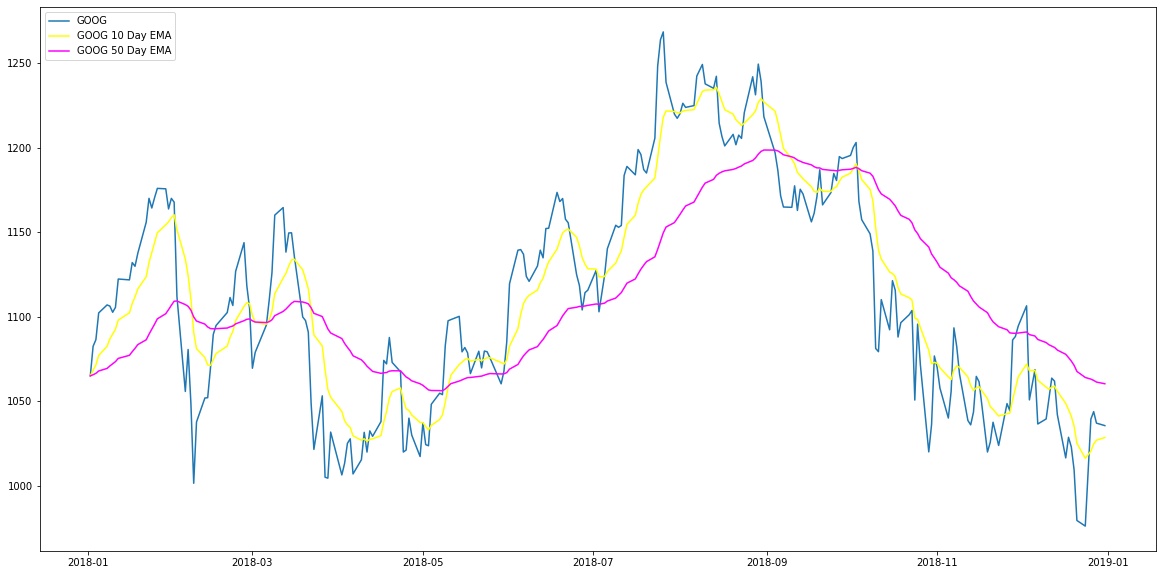

In [ ]:
exp1 = data.close.ewm(span=10, adjust=False).mean()
exp2 = data.close.ewm(span=50, adjust=False).mean()
plt.figure(figsize=(20,10))
plt.plot(data.close, label='GOOG')
plt.plot(exp1, label='GOOG 10 Day EMA',color='yellow')
plt.plot(exp2, label='GOOG 50 Day EMA',color='magenta')
plt.legend(loc='upper left')
plt.show()


RSI

In [ ]:
def get_rsi_timeseries(prices, n=14):
    # RSI = 100 - (100 / (1 + RS))
    # where RS = (Wilder-smoothed n-period average of gains / Wilder-smoothed n-period average of -losses)
    # Note that losses above should be positive values
    # Wilder-smoothing = ((previous smoothed avg * (n-1)) + current value to average) / n
    # For the very first "previous smoothed avg" (aka the seed value), we start with a straight average.
    # Therefore, our first RSI value will be for the n+2nd period:
    #     0: first delta is nan
    #     1:
    #     ...
    #     n: lookback period for first Wilder smoothing seed value
    #     n+1: first RSI

    # First, calculate the gain or loss from one price to the next. The first value is nan so replace with 0.
    deltas = (prices-prices.shift(1)).fillna(0)

    # Calculate the straight average seed values.
    # The first delta is always zero, so we will use a slice of the first n deltas starting at 1,
    # and filter only deltas > 0 to get gains and deltas < 0 to get losses
    avg_of_gains = deltas[1:n+1][deltas > 0].sum() / n
    avg_of_losses = -deltas[1:n+1][deltas < 0].sum() / n

    # Set up pd.Series container for RSI values
    rsi_series = pd.Series(0.0, deltas.index)

    # Now calculate RSI using the Wilder smoothing method, starting with n+1 delta.
    up = lambda x: x if x > 0 else 0
    down = lambda x: -x if x < 0 else 0
    i = n+1
    for d in deltas[n+1:]:
        avg_of_gains = ((avg_of_gains * (n-1)) + up(d)) / n
        avg_of_losses = ((avg_of_losses * (n-1)) + down(d)) / n
        if avg_of_losses != 0:
            rs = avg_of_gains / avg_of_losses
            rsi_series[i] = 100 - (100 / (1 + rs))
        else:
            rsi_series[i] = 100
        i += 1

    return rsi_series

In [ ]:
y=get_rsi_timeseries(data.close, n=14)
y

Date
2018-01-02     0.000000
2018-01-03     0.000000
2018-01-04     0.000000
2018-01-05     0.000000
2018-01-08     0.000000
                ...    
2018-12-24    34.556114
2018-12-26    49.665780
2018-12-27    50.525558
2018-12-28    49.135016
2018-12-31    48.822212
Length: 251, dtype: float64

In [ ]:
df=y.to_frame().reset_index()
df.rename(columns={0:'RSI'},inplace='True')
df


,Date,RSI
0,2018-01-02,0.000000
1,2018-01-03,0.000000
2,2018-01-04,0.000000
3,2018-01-05,0.000000
4,2018-01-08,0.000000
...,...,...
246,2018-12-24,34.556114
247,2018-12-26,49.665780
248,2018-12-27,50.525558
249,2018-12-28,49.135016


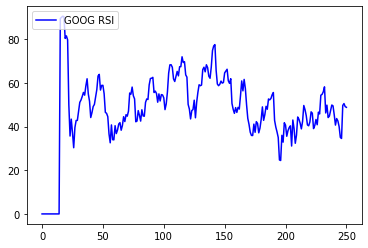

In [ ]:
plt.plot(df.RSI, label='GOOG RSI', color='Blue')
plt.legend(loc='upper left')
plt.show()

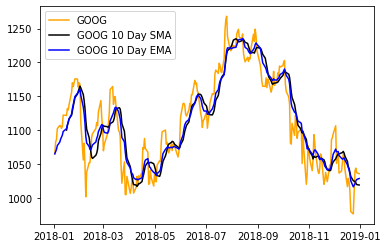

<Figure size 864x576 with 0 Axes>

In [ ]:
plt.plot(data.close, label='GOOG',color='Orange')
plt.plot(rolling_mean, label='GOOG 10 Day SMA', color='Black')
plt.plot(exp1, label='GOOG 10 Day EMA',color='Blue')
plt.legend(loc='upper left')
#plt.plot(df.RSI, label='GOOG RSI', color='Green')
plt.figure(figsize=(12,8))


plt.show()

MACD

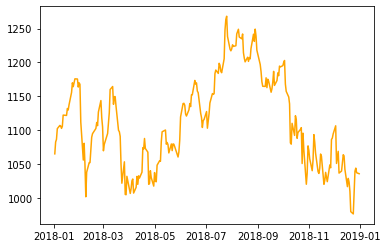

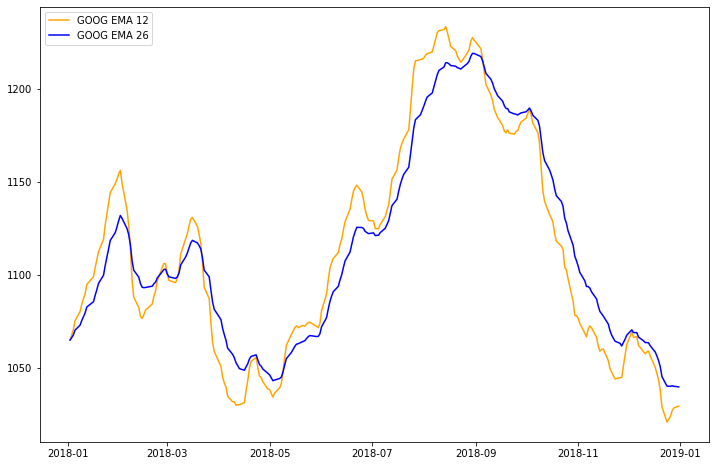

In [ ]:
exp1 = data.close.ewm(span=12, adjust=False).mean()
exp2 = data.close.ewm(span=26, adjust=False).mean()
plt.plot(data.close, label='GOOG',color='Orange')
plt.figure(figsize=(12,8))
plt.plot(exp1, label='GOOG EMA 12', color = 'Orange')
plt.plot( exp2, label='GOOG EMA 26', color='Blue')
plt.legend(loc='upper left')
plt.show()

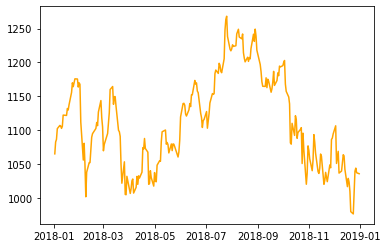

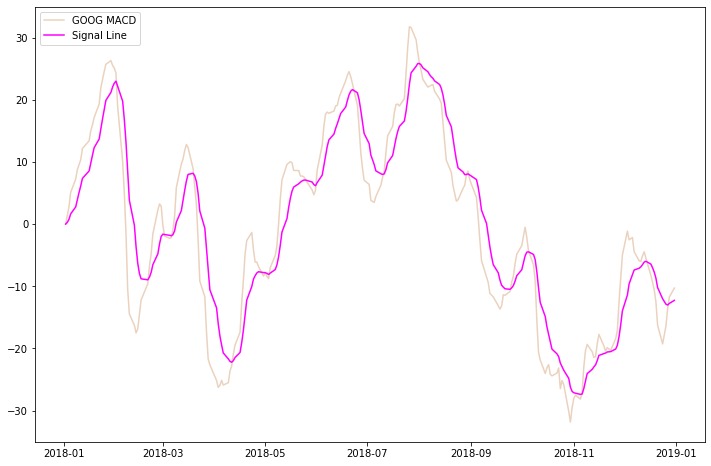

In [ ]:
exp1 = data.close.ewm(span=12, adjust=False).mean()
exp2 = data.close.ewm(span=26, adjust=False).mean()
macd = exp1-exp2
exp3 = macd.ewm(span=9, adjust=False).mean() 
plt.plot(data.close, label='GOOG',color='Orange')
plt.figure(figsize=(12,8))
plt.plot(macd, label='GOOG MACD', color = '#EBD2BE')
plt.plot( exp3, label='Signal Line', color='Magenta')
plt.legend(loc='upper left')
plt.show()

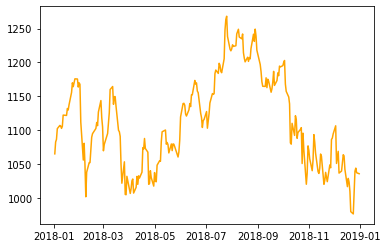

<Figure size 576x576 with 0 Axes>

In [ ]:
plt.plot(data.close, label='GOOG',color='Orange')
plt.figure(figsize=(8,8))

plt.show()
